In [3]:
import pandas as pd
import numpy as np
import json

import random

Data Cleaning and Preprocessing

In [4]:
with open('vnexpress_news.json') as f:
    data = json.load(f)
    df = pd.DataFrame(data)

In [5]:
df = df[df["content"] != "Error"]
df = df[df["content"] != ""]
df

,title,url,content,cluster
0,Khánh thành tượng Trịnh Công Sơn bên dòng sông...,https://vnexpress.net/khanh-thanh-tuong-trinh-...,Kỷ niệm 85 năm ngày sinh nhạc sĩ Trịnh Công Sơ...,3
1,Cả nước sáp nhập 50 huyện trong năm nay,https://vnexpress.net/ca-nuoc-sap-nhap-50-huye...,"Chiều 28/2, tại phiên họp Ban Chỉ đạo thực hiệ...",1
2,Phó thủ tướng: Khó tăng lương vì bộ máy nặng nề,https://vnexpress.net/pho-thu-tuong-kho-tang-l...,Chủ trì phiên họp Ban chỉ đạo sắp xếp đơn vị h...,3
3,"'Thời tiết những tháng tới sẽ bất thường, ngoà...",https://vnexpress.net/thoi-tiet-nhung-thang-to...,"VnExpress phỏng vấn PGS.TS Phạm Thị Thanh Ngà,...",3
4,Không khí lạnh tăng cường xuống miền Bắc,https://vnexpress.net/khong-khi-lanh-tang-cuon...,Trung tâm Dự báo Khí tượng Thủy văn quốc gia c...,3
...,...,...,...,...
2851,Dã tràng xe cát để làm gì?,https://vnexpress.net/da-trang-xe-cat-de-lam-g...,>> Xem đáp án\nMộc Trà\n,2
2852,Dấu vân tay tiết lộ bạn chung thủy hay dễ ngoạ...,https://vnexpress.net/dau-van-tay-tiet-lo-ban-...,>> Xem giải thích\nMộc Trà (Theo Asiacue)\n,2
2853,Tôm đuổi cá tránh xa bạn tình đang mang thai,https://vnexpress.net/tom-duoi-ca-tranh-xa-ban...,"Đây đúng là hình ảnh một 'người chồng, người c...",3
2854,Tôm càng 'khóa môi' chàng ngư dân,https://vnexpress.net/tom-cang-khoa-moi-chang-...,Đây là hậu quả của việc thích khoe mẽ các anh ...,3


In [6]:
news_url = df['url'].tolist()
news_title = df['title'].tolist()
content = df['content'].tolist()

TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer is a popular technique in Natural Language Processing (NLP) used to convert a collection of raw text documents into a numerical format that can be fed into machine learning models. Here's a summary of its functionality:

    Term Frequency (TF):
    Measures the frequency of a term (word) within a document. It indicates how often a word appears in a document relative to the total number of words in that document. Calculated as the number of occurrences of a term in a document divided by the total number of terms in that document.

    Inverse Document Frequency (IDF):
    Measures the importance of a term across a collection of documents. Words that occur frequently across many documents receive lower IDF scores, while those that are rare or unique receive higher scores. Calculated as the logarithm of the total number of documents divided by the number of documents containing the term.

    TF-IDF Calculation:
    Combines TF and IDF to assign a weight to each term in a document relative to its importance in the entire collection of documents. The TF-IDF score for a term in a document is calculated by multiplying its TF and IDF scores.

    Vectorization:
    Represents each document as a vector in a high-dimensional space, where each dimension corresponds to a unique term in the entire corpus. The vector contains TF-IDF scores for each term in the document. The result is a numerical representation that captures the importance of words in each document relative to the entire corpus.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_tfidf_vector(corpus):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(corpus)
    return X.toarray(), vectorizer.get_feature_names_out()



In [8]:
# Rank features based on their popularity
def rank_features(X, feature_names):
    feature_scores = np.sum(X, axis=0)
    return sorted(zip(feature_names, feature_scores), key=lambda x: x[1], reverse=True)

In [9]:
X, feature_names = get_tfidf_vector(content)
print(X, len(feature_names))

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.07640489 0.         ... 0.         0.         0.        ]
 [0.         0.07720347 0.         ... 0.         0.03281058 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]] 16216


Each document is represented as a vector of TF-IDF scores, and the entire collection of documents is represented as a matrix where each row corresponds to a document and each column corresponds to a unique term in the entire corpus. This matrix can then be used as input to machine learning models for tasks such as classification, clustering, and information retrieval. In this case study, we'll use the TF-IDF Vectorizer to convert a collection of raw text documents into a matrix of TF-IDF features, and then use the resulting matrix as input for K-Means clustering to group similar documents together.

c:\ProgramData\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


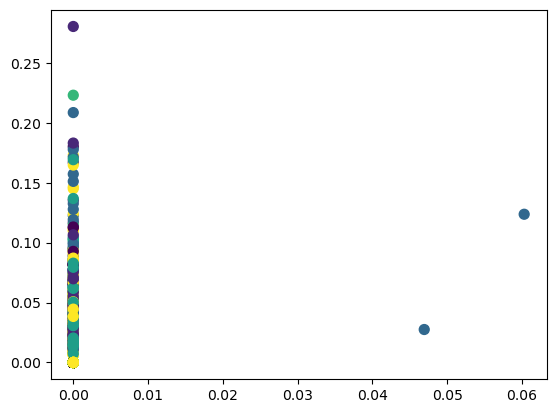

In [10]:
# apply Kmeans clustering to the tfidf matrix
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

# Plot the clusters
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')

The plot above shows the distribution of news content, but this is not clear enough to understand its disparity. In this case, we will further implement PCA to get a more explanatory plot.

c:\ProgramData\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


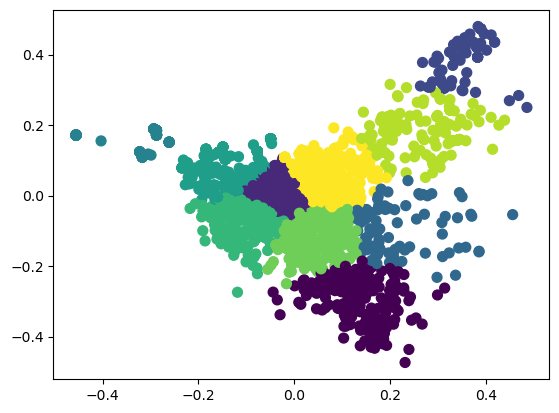

In [11]:
# Plot the clusters
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters=10, random_state=0).fit(X_pca)


plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, s=50, cmap='viridis')

Save the data with the group of clusters:

In [17]:
df[:100]


,title,url,content,cluster,cluster_pca
0,Khánh thành tượng Trịnh Công Sơn bên dòng sông...,https://vnexpress.net/khanh-thanh-tuong-trinh-...,Kỷ niệm 85 năm ngày sinh nhạc sĩ Trịnh Công Sơ...,9,1
1,Cả nước sáp nhập 50 huyện trong năm nay,https://vnexpress.net/ca-nuoc-sap-nhap-50-huye...,"Chiều 28/2, tại phiên họp Ban Chỉ đạo thực hiệ...",3,1
2,Phó thủ tướng: Khó tăng lương vì bộ máy nặng nề,https://vnexpress.net/pho-thu-tuong-kho-tang-l...,Chủ trì phiên họp Ban chỉ đạo sắp xếp đơn vị h...,3,1
3,"'Thời tiết những tháng tới sẽ bất thường, ngoà...",https://vnexpress.net/thoi-tiet-nhung-thang-to...,"VnExpress phỏng vấn PGS.TS Phạm Thị Thanh Ngà,...",9,1
4,Không khí lạnh tăng cường xuống miền Bắc,https://vnexpress.net/khong-khi-lanh-tang-cuon...,Trung tâm Dự báo Khí tượng Thủy văn quốc gia c...,9,5
...,...,...,...,...,...
95,CSGT tăng cường xử phạt tài xế vượt ẩu trên ca...,https://vnexpress.net/csgt-tang-cuong-xu-phat-...,"Ngày 21/2, thiếu tá Dương Xuân Đạt, Phó đội tr...",1,6
96,Hơn 50 công nhân nhập viện,https://vnexpress.net/hon-50-cong-nhan-nhap-vi...,"Khoảng 9h30, sau khi hàng chục công nhân có bi...",9,1
97,Không khí lạnh tràn xuống miền Bắc từ tối mai,https://vnexpress.net/khong-khi-lanh-tran-xuon...,Trung tâm Dự báo Khí tượng Thủy văn quốc gia c...,9,5
98,Bộ Công an: Duy trì nồng độ cồn bằng 0 với lái...,https://vnexpress.net/bo-cong-an-duy-tri-nong-...,Trong văn bản tham gia giải trình một số nội d...,1,7


For possible future work, I have found a couple of methodogies that suits the conducted topic. I will leave all the references in the end of the notebook.

- News article clustering: https://github.com/parkervg/news-article-clustering/tree/master

    In this work, the authors have further labeled the data based on the content of the news. This is a very interesting approach to understand the content of the news and to further understand the distribution of the news. 
    The pipeline is as follows:
    
    1. Data Cleaning and Analysis
    2. Data Preprocessing: Customizing TF-IDF Vectorizer and combining NER task with tokenization to highlight the importance of occurrences such as persons or names.
    3. Clustering: Using K-Means and HAC to cluster the news articles.
    4. Evaluation: Using F1 and Silhouette Score to evaluate the performance of the clustering.

- Prompt Engineering for Text Summarization / Topic Collection:

- Encoding models like BERT (in this case, PhoBERT with py_vncorenlp for word segmentation or Electra for NER) for embedding the text and then using clustering algorithms to group the news articles. 
